## Summer Olympic Games

The table comes from wikipedia page about Summer Olympic Games (https://en.wikipedia.org/wiki/Summer_Olympic_Games). It summaries the list of events that has taken place so far.

I have scrapped the table to csv file using Excel.

In [4]:
import pandas as pd
import numpy as np
from datetime import date

df = pd.read_csv("../input/summerolympics/Summer Olympic Games.csv", sep=";")

In [5]:
df

,Olympiad,No.,Host,Games dates / Opened by,Sports (Disciplines),Competitors Total,Competitors Men,Competitors Women,Events,Nations,Top nation,Column12,Unnamed: 12
0,Olympiad,No.,Host,Games dates /\r\nOpened by,Sports\r\n(Disciplines),Competitors,Competitors,Competitors,Events,Nations,Top nation,NaN,NaN
1,Olympiad,No.,Host,Games dates /\r\nOpened by,Sports\r\n(Disciplines),Total,Men,Women,Events,Nations,Top nation,NaN,NaN
2,1896,I,Athens,6–15 April 1896\r\nKing George I,9 (10),241,241,0,43,14+1,United States,NaN,NaN
3,1900,II,Paris,14 May – 28 October 1900\r\nN/A,19 (20),1226,NaN,NaN,95,26+4+1,France,NaN,NaN
4,1904,III,St. Louis,1 July – 23 November 1904\r\nFormer Mayor Davi...,16 (17),651,645,6,95,12+1,United States,NaN,NaN
5,1908,IV,London,27 April – 31 October 1908\r\nKing Edward VII,22 (25),2008,1971,37,110,22,Great Britain,NaN,NaN
6,1912,V,Stockholm,6–22 July 1912\r\nKing Gustaf V,14 (18),2407,2359,48,102,28,United States,NaN,NaN
7,1916,VI,Awarded to Germany (Berlin). Cancelled due to ...,Awarded to Germany (Berlin). Cancelled due to ...,Awarded to Germany (Berlin). Cancelled due to ...,Awarded to Germany (Berlin). Cancelled due to ...,Awarded to Germany (Berlin). Cancelled due to ...,Awarded to Germany (Berlin). Cancelled due to ...,Awarded to Germany (Berlin). Cancelled due to ...,Awarded to Germany (Berlin). Cancelled due to ...,Awarded to Germany (Berlin). Cancelled due to ...,Awarded to Germany (Berlin). Cancelled due to ...,NaN
8,1920,VII,Antwerp,14 August – 12 September 1920\r\nKing Albert I,22 (29),2626,2561,65,156,29,United States,NaN,NaN
9,1924,VIII,Paris,5–27 July 1924\r\nPresident Gaston Doumergue,17 (23),3089,2954,135,126,44,United States,NaN,NaN


## Data Cleaning
As summarized in the outcome of head() function, there are couple of things that could be cleaned:

### 1. Deleting useless columns

In [6]:
df.drop(columns = ["Column12", "Unnamed: 12"], inplace = True)

### 2. Deleting rows that contain information about future olympic games
Those rows include mostly TBA data, therefore it does not make sense to keep it

In [7]:
df.drop(df.index[df["Olympiad"] > "2022"], inplace = True)
df.reset_index(inplace = True, drop = True)

### 3. Deleting all rows that contain non-numerical data in "Competitors Total" column
Those are rows that describe years, when there was World War I/II and two first rows that are duplicated columns names

In [8]:
str_val = [val for val in df["Competitors Total"].values if len(val) > 6]
str_id = [df.index[df["Competitors Total"] == val] for val in str_val]
str_id_list = [str_id[x][0] for x in range(0,len(str_id))]

df.drop(str_id_list, inplace = True)
df.drop(df.index[df["Competitors Total"] == "Total"], inplace = True)

df.reset_index(inplace = True, drop = True)

### 4. Split of column "Games dates / Opened by" and "Sports (Disciplines" into four separate ones

In [9]:
df[["Games dates", "Opened by"]] = df["Games dates / Opened by"].str.split("\r\n", expand = True)
df.drop(columns = "Games dates / Opened by", inplace = True)

In [10]:
df[["Sports", "Disciplines_tbd"]] = df["Sports (Disciplines)"].str.split("(", expand = True)
df.drop(columns = "Sports (Disciplines)", inplace = True)

df[["Disciplines","to_be_deleted"]] = df["Disciplines_tbd"].str.split(")", expand = True)
df.drop(columns = ["Disciplines_tbd", "to_be_deleted"], inplace = True)

### 5. Conversion of dates from descriptive format to standard


Replacing names of months with numeric description

In [11]:
months = {" January " : ".01.",
         " February " : ".02.",
         " March " : ".03.",
         " April " : ".04.",
         " May " : ".05.",
         " June " : ".06.",
         " July " : ".07.",
         " August " : ".08.",
         " September " : ".09.",
         " October " : ".10.",
         " November " : ".11.",
         " December " : ".12."
         }


for key, value in months.items():
    df["Games dates"] = df["Games dates"].str.replace(key, value)
    

Split of "Games dates" column into "Games dates start" and "Games dates end"

In [12]:
df[["Games dates start", "Games dates end"]] = df["Games dates"].str.split("–", expand = True)
df.drop(columns = "Games dates", inplace = True)

Final cleanup of "Games dates end" - removing spaces and unifying format, so that all dates have format: dd.mm.yyyy

In [13]:
df["Games dates end"] = df["Games dates end"].str.replace(" ","")

for i in range(0,len(df["Games dates end"])):
    if len(df["Games dates end"][i]) != 10:
        df["Games dates end"][i] = "0" + df["Games dates end"][i]

Final cleanup of "Games dates start" - if it contains only day information, then adding month and year from "Games dates end" column, if it contains day and month information, then adding only year from "Games dates end".
At the end unifying to format dd.mm.yyyy

In [14]:
for i in range(0,len(df["Games dates start"])):
    if len(df["Games dates start"][i]) <= 2:
        df["Games dates start"][i] += df["Games dates end"][i][2:]
    else:
        df["Games dates start"][i] += df["Games dates end"][i][6:]

In [15]:
for i in range(0,len(df["Games dates start"])):
    if len(df["Games dates start"][i]) != 10:
        df["Games dates start"][i] = "0" + df["Games dates start"][i]

### 6. Removing second row, because it contains N/A 

In [16]:
df.drop(1, inplace = True)
df.reset_index(inplace = True, drop = True)

### 7. Replacing values in "Nations" column to sum

In [17]:
df["Nations"][0] = "15"
df["Nations"][1] = "13"

### 8. Correcting data types

In [18]:
df.dtypes

Olympiad             object
No.                  object
Host                 object
Competitors Total    object
Competitors Men      object
Competitors Women    object
Events               object
Nations              object
Top nation           object
Opened by            object
Sports               object
Disciplines          object
Games dates start    object
Games dates end      object
dtype: object

Converting to string

In [19]:
df = df.convert_dtypes()

Converting to int

In [20]:
df["Olympiad"] = pd.to_numeric(df["Olympiad"])
df["Competitors Total"] = pd.to_numeric(df["Competitors Total"])
df["Competitors Men"] = pd.to_numeric(df["Competitors Men"])
df["Competitors Women"] = pd.to_numeric(df["Competitors Women"])
df["Events"] = pd.to_numeric(df["Events"])
df["Nations"] = pd.to_numeric(df["Nations"])
df["Sports"] = pd.to_numeric(df["Sports"])
df["Disciplines"] = pd.to_numeric(df["Disciplines"])

Converting to datetime type

In [21]:
df["Games dates start"] = pd.to_datetime(df["Games dates start"])
df["Games dates end"] = pd.to_datetime(df["Games dates end"])

In [22]:
df.dtypes

Olympiad                      int64
No.                          string
Host                         string
Competitors Total             int64
Competitors Men               int64
Competitors Women             int64
Events                        int64
Nations                       int64
Top nation                   string
Opened by                    string
Sports                        int64
Disciplines                   int64
Games dates start    datetime64[ns]
Games dates end      datetime64[ns]
dtype: object

### Final version of the table

In [23]:
df

,Olympiad,No.,Host,Competitors Total,Competitors Men,Competitors Women,Events,Nations,Top nation,Opened by,Sports,Disciplines,Games dates start,Games dates end
0,1896,I,Athens,241,241,0,43,15,United States,King George I,9,10,1896-06-04,1896-04-15
1,1904,III,St. Louis,651,645,6,95,13,United States,Former Mayor David R. Francis,16,17,1904-01-07,1904-11-23
2,1908,IV,London,2008,1971,37,110,22,Great Britain,King Edward VII,22,25,1908-04-27,1908-10-31
3,1912,V,Stockholm,2407,2359,48,102,28,United States,King Gustaf V,14,18,1912-06-07,1912-07-22
4,1920,VII,Antwerp,2626,2561,65,156,29,United States,King Albert I,22,29,1920-08-14,1920-12-09
5,1924,VIII,Paris,3089,2954,135,126,44,United States,President Gaston Doumergue,17,23,1924-05-07,1924-07-27
6,1928,IX,Amsterdam,2883,2606,277,109,46,United States,Duke Henry of Mecklenburg-Schwerin,14,20,1928-07-28,1928-12-08
7,1932,X,Los Angeles,1332,1206,126,117,37,United States,Vice President Charles Curtis,14,20,1932-07-30,1932-08-14
8,1936,XI,Berlin,3963,3632,331,129,49,Germany,Chancellor Adolf Hitler,19,25,1936-01-08,1936-08-16
9,1948,XIV,London,4104,3714,390,136,59,United States,King George VI,17,23,1948-07-29,1948-08-14


## Linear regression

In the following paragraph I will investigate the relationship between number of disciplines and competitors. The knowledge of regression can help the organizators to predict to which amount of people they must be prepared in case they decide to increase or decrease the number of competitors.

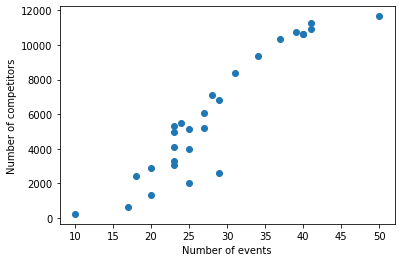

In [33]:
plt.scatter(df["Disciplines"], df["Competitors Total"])
plt.xlabel("Number of events")
plt.ylabel("Number of competitors")
plt.show()

In [34]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [45]:
X_train = np.array(df["Disciplines"]).reshape((-1,1))
y_train = df["Competitors Total"]

so_model = LinearRegression().fit(X_train, y_train)
y_predict = so_model.predict(X_train)

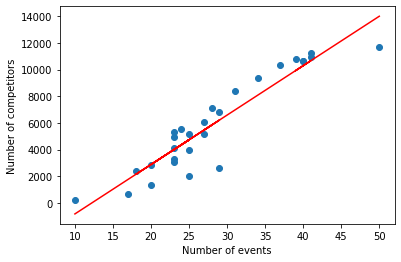

In [48]:
plt.scatter(df["Disciplines"], df["Competitors Total"])
plt.plot(df["Disciplines"], y_predict, color = "red")
plt.xlabel("Number of events")
plt.ylabel("Number of competitors")
plt.show()

## Evaluation

In [43]:
r_sq = so_model.score(X_train, y_train)

In [44]:
print(r_sq)

0.8685510566908599
